<a href="https://colab.research.google.com/github/StevenBryceLee/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/Steven_Lee_LS_DS_123_Confidence_Intervals_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

## Part 1 - Setting the Stage

**1) Load the dataset**

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
0,62,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data scientist or machine l...,12-14 years,6-8 years,120000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;F#;Haskell;Python;Scala,Male,25 - 34 years old,White or of European descent
1,73,No,Employed full-time,"A humanities discipline (ex. literature, histo...",Back-end developer;Full-stack developer;System...,0-2 years,0-2 years,36000.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Four to six months,Java;JavaScript;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,White or of European descent
2,127,"Yes, full-time",Employed full-time,"A business discipline (ex. accounting, finance...",Full-stack developer,3-5 years,3-5 years,59980.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C#;JavaScript;TypeScript;HTML;CSS,Male,25 - 34 years old,East Asian
3,140,No,Employed full-time,"A social science (ex. anthropology, psychology...",Data scientist or machine learning specialist;...,9-11 years,3-5 years,70000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Tapping ...,I haven’t gotten a developer job,JavaScript;Python;SQL;VBA,Male,25 - 34 years old,White or of European descent
4,153,No,Employed full-time,"Computer science, computer engineering, or sof...",Mobile developer,6-8 years,3-5 years,105000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C;Java;JavaScript;Objective-C;PHP;Python;Ruby;...,Male,25 - 34 years old,White or of European descent


In [ ]:
#Intentionally dropping the unnamed column. We'll see if that comes back to bite me
df.drop(df.columns[0], inplace=True, axis='columns')
df.head()

,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
0,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data scientist or machine l...,12-14 years,6-8 years,120000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;F#;Haskell;Python;Scala,Male,25 - 34 years old,White or of European descent
1,No,Employed full-time,"A humanities discipline (ex. literature, histo...",Back-end developer;Full-stack developer;System...,0-2 years,0-2 years,36000.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Four to six months,Java;JavaScript;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,White or of European descent
2,"Yes, full-time",Employed full-time,"A business discipline (ex. accounting, finance...",Full-stack developer,3-5 years,3-5 years,59980.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C#;JavaScript;TypeScript;HTML;CSS,Male,25 - 34 years old,East Asian
3,No,Employed full-time,"A social science (ex. anthropology, psychology...",Data scientist or machine learning specialist;...,9-11 years,3-5 years,70000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Tapping ...,I haven’t gotten a developer job,JavaScript;Python;SQL;VBA,Male,25 - 34 years old,White or of European descent
4,No,Employed full-time,"Computer science, computer engineering, or sof...",Mobile developer,6-8 years,3-5 years,105000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C;Java;JavaScript;Objective-C;PHP;Python;Ruby;...,Male,25 - 34 years old,White or of European descent


**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [ ]:
sample20 = df.sample(20,random_state=42)
sample20.head(3)

,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
367,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data or business analyst;Da...,0-2 years,0-2 years,74500.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Online d...,I already had a full-time job as a developer w...,JavaScript;PHP;Python;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,"Native American, Pacific Islander, or Indigeno..."
2759,No,"Not employed, but looking for work","A health science (ex. nursing, pharmacy, radio...",Mobile developer,0-2 years,0-2 years,60000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Six months to a year,C;C#;Objective-C;Swift,Male,18 - 24 years old,Black or of African descent
1330,No,Employed full-time,"Information systems, information technology, o...",Back-end developer;DevOps specialist;Front-end...,3-5 years,3-5 years,86120.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C#;Java;JavaScript;SQL;TypeScript;HTML;CSS,Male,25 - 34 years old,White or of European descent


In [ ]:
#Note, since I'm using the same random state, sample_200 contains sample20
sample_200 = df.sample(200,random_state=42)
sample_200.head(3)

,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
367,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data or business analyst;Da...,0-2 years,0-2 years,74500.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Online d...,I already had a full-time job as a developer w...,JavaScript;PHP;Python;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,"Native American, Pacific Islander, or Indigeno..."
2759,No,"Not employed, but looking for work","A health science (ex. nursing, pharmacy, radio...",Mobile developer,0-2 years,0-2 years,60000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Six months to a year,C;C#;Objective-C;Swift,Male,18 - 24 years old,Black or of African descent
1330,No,Employed full-time,"Information systems, information technology, o...",Back-end developer;DevOps specialist;Front-end...,3-5 years,3-5 years,86120.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C#;Java;JavaScript;SQL;TypeScript;HTML;CSS,Male,25 - 34 years old,White or of European descent


**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

In [ ]:
print("Sample 20 mean:\t\t{}\nSample 200 mean:\t{}".format(sample20['ConvertedSalary'].mean(),sample_200['ConvertedSalary'].mean()))

Sample 20 mean:		55752.2
Sample 200 mean:	68551.255


**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

I trust the n=200 more. Increasing n increases the precision and accuracy of the estimate of the population mean by decreasing the error of the sample. It depends on the intuitions of the non-technical audience. I think it makes sense that knowing more is better than knowing less.

**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

Not really. If I was only given the sample mean as a value, without knowing the size of the sample or the size of the population, I think it is impossible to tell anything about the sampling error. For example, if the population itself is 20, then the sample of 20 gives 100% accuracy. Practically speaking, We can sort of see the accuracy based on the significant figures in the mean, but this does not give us a true sampling error.

**6) What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



Confidence intervals are very helpful, especially in a graph. Even if the means appear to be different, if both of the confidence intervals between two groups are very similar, then we would be less sure that there is a difference. Additionally, if the confidence interval is very large, then we would know that the mean estimate is probably inaccurate

## Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



In [ ]:
mean20, mean_200 = (sample20['ConvertedSalary'].mean(),sample_200['ConvertedSalary'].mean())

In [ ]:
import numpy as np
from scipy import stats

In [ ]:
def confidence_interval(sample, alpha = 0.95):
  '''
  sample is the sample of data that we are using. 1 dimensional list or array
  alpha is the confidence level. Using 95% as a default
  returns tuple of upper and lower confidence interval around mean
  requires numpy and scipy.stats modules
  '''
  #Convert to numpy array
  data = np.array(sample)

  #stdev for a SAMPLE, not a population by passing ddof=1
  stdev = np.std(data, ddof=1)

  sample_size = data.shape[0]
  sample_mean = np.mean(data)

  #T statistic. The function only looks up the positive, 1 tailed t stat
  #Therefore, we take the percentile to 97.5% for the 1 tailed, which is equivalent
  percentile =  1 - ((1 - alpha) / 2)
  #The second parameter is degrees of freedom. Since this is a sample, we use n - 1 
  t = stats.t.ppf(percentile, sample_size-1)
  std_err = stdev / np.sqrt(sample_size)

  #margin of error
  moe = t*std_err

  lower_bound = sample_mean - moe
  upper_bound = sample_mean + moe
  return (lower_bound,upper_bound)

In [ ]:
confidence_interval(sample20['ConvertedSalary'])

(35805.10309625536, 75699.29690374463)

In [ ]:
confidence_interval(sample_200['ConvertedSalary'])

(60593.058804479086, 76509.45119552092)

**2) Which confidence interval is wider and why?**

The confidence interval of the first sample is much wider. Due to its lower sample size the standard error of our estimate is much larger causing the potential distribution of sample means to be much more spread out. A confidence interval catches 95% of this theoretical distribution of sample means so if our standard error is larger, our confidence interval will be wider as well. If we want to be equally confident for both our n=20 sample and n=200 sample, then we have to make much more relaxed statements about the true population mean based on the n=20 sample

**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

In [ ]:
def moe(sample, alpha = 0.95, ispop = False):
  data = np.array(sample)

  #stdev for a SAMPLE, not a population by passing ddof=1
  stdev = np.std(data, ddof=1)
  if ispop:
    stdev = np.std(data)

  sample_size = data.shape[0]
  sample_mean = np.mean(data)

  #T statistic. The function only looks up the positive, 1 tailed t stat
  #Therefore, we take the percentile to 97.5% for the 1 tailed, which is equivalent
  percentile =  1 - ((1 - alpha) / 2)
  #The second parameter is degrees of freedom. Since this is a sample, we use n - 1 
  t = stats.t.ppf(percentile, sample_size-1)
  std_err = stdev / np.sqrt(sample_size)

  #margin of error
  moe = t*std_err
  return moe

In [ ]:
print('mean n=20:\t{}\nmoe n=20:\t{}'.format(np.mean(sample20['ConvertedSalary']),moe(sample20['ConvertedSalary'])))

mean n=20:	55752.2
moe n=20:	19947.096903744638


In [ ]:
print('mean n=200:\t{}\nmoe n=200:\t{}'.format(np.mean(sample_200['ConvertedSalary']),moe(sample_200['ConvertedSalary'])))

mean n=200:	68551.255
moe n=200:	7958.196195520917


Margin of error gives us the distribution, or error of the sample data, multiplied by our necessary level of confidence. If we want 95% confidence, we are 95% sure that the true population mean is below the upper margin of error and above the lower margin of error

The margin of error gives an idea of how far off our estimates might be (with 95% confidence). We're trying to supply a plausible range for our parameter of interest (the true average salary of bootcamp grads).

## Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

In [ ]:
import matplotlib.pyplot as plt

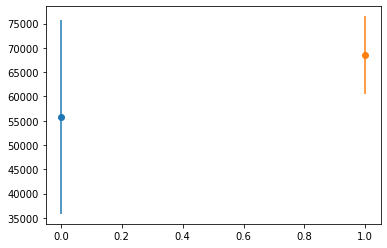

In [ ]:
salary20 = sample20['ConvertedSalary']
salary200 = sample_200['ConvertedSalary']

#params in order, (x location, central point, margin of error, formatting of point)
plt.errorbar(0,np.mean(salary20),yerr=moe(salary20),fmt='o')
plt.errorbar(1,np.mean(salary200),yerr=moe(salary200),fmt='o')
plt.show()

**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

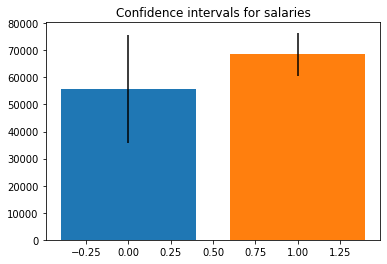

In [ ]:
#params in order (x location, height of bar, margin of error)
plt.bar(0,height = np.mean(salary20),yerr=moe(salary20))
plt.bar(1,height = np.mean(salary200),yerr=moe(salary200))
plt.title('Confidence intervals for salaries')
plt.show()

## Part 4 - Check for Understanding







**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

2153.1843048340097
7958.196195520917


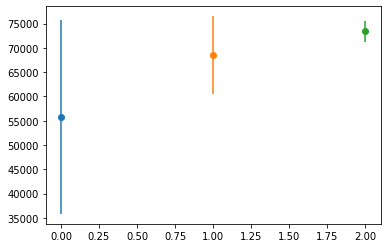

In [ ]:
dfsal = (df['ConvertedSalary'])
plt.errorbar(0,np.mean(salary20),yerr=moe(salary20),fmt='o')
plt.errorbar(1,np.mean(salary200),yerr=moe(salary200),fmt='o')
plt.errorbar(2,np.mean(dfsal),yerr=moe(dfsal,ispop=True),fmt='o')
plt.show()

Very small errors, which makes sense given the larger amount of data

**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**

Precision is a measure of dispersion while accuracy is a measure of average correctness. High precision means there is not very much variation in the measurements. High accuracy means the average of the measurements is very close to the true value in the population

**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**

There is a 95% chance that the true value is within the upper and lower bound of the estimated value.

# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.

In [ ]:
sample20.head(2)

,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
367,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data or business analyst;Da...,0-2 years,0-2 years,74500.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Online d...,I already had a full-time job as a developer w...,JavaScript;PHP;Python;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,"Native American, Pacific Islander, or Indigeno..."
2759,No,"Not employed, but looking for work","A health science (ex. nursing, pharmacy, radio...",Mobile developer,0-2 years,0-2 years,60000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Six months to a year,C;C#;Objective-C;Swift,Male,18 - 24 years old,Black or of African descent


In [ ]:
#Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
### YOUR WORK HERE
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
columns = ['symboling','norm_loss','make','fuel','aspiration','doors',
           'bod_style','drv_wheels','eng_loc','wheel_base','length','width',
           'height','curb_weight','engine','cylinders','engine_size',
           'fuel_system','bore','stroke','compression','hp','peak_rpm',
           'city_mpg','hgwy_mpg','price']
auto = pd.read_csv(url, names=columns, na_values = '?')
auto.head()

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,wheel_base,length,width,height,curb_weight,engine,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [ ]:
mpg = auto['hgwy_mpg']
confidence_interval(mpg)

(29.802909673080563, 31.69952935130968)

In [ ]:
#Run a 1-sample t-test with the null hypothesis value being just barely outside of the confidence interval. What is the p-value?
stats.ttest_1samp(mpg,33,nan_policy='omit')

Ttest_1sampResult(statistic=-4.675510422834794, pvalue=5.326332531770149e-06)

In [ ]:
#Run a 1-sample t-test with the null hypothesis value being just barely inside of the confidence interval. What is the p-value?
stats.ttest_1samp(mpg,31.5,nan_policy='omit')

Ttest_1sampResult(statistic=-1.556813123438485, pvalue=0.12106486176651134)

In [ ]:
#What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?

This means that if the measured value is inside the bounds of the confidence interval, then the p value will be less than 0.05, or not significant. This means that there is no difference between the population mean and the sample mean.

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
cols = [
        'Party',
        'handicapped-infants',
        'water-project-cost-sharing',
        'adoption-of-the-budget-resolution',
        'physician-fee-freeze',
        'el-salvador-aid',
        'religious-groups-in-schools',
        'anti-satellite-test-ban',
        'aid-to-nicaraguan-contras',
        'mx-missile',
        'immigration',
        'synfuels-corporation-cutback',
        'education-spending',
        'superfund-right-to-sue',
        'crime',
        'duty-free-exports',
        'export-administration-act-south-africa',
        ]
votes = pd.read_csv(url,names = cols,na_values='?')
votes.head()

,Party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [ ]:
#build confidence intervals around the means of all of the issues for a single party. 
dems = votes[votes['Party'] == 'democrat'].drop('Party', axis = 1)
dems.replace({'n':int(0),'y':int(1)},inplace=True)
dems.head(3)

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
2,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [ ]:
demsclean = dems.dropna()
demsclean.head(3)

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
5,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
19,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
23,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
intervals = []
for col in demsclean.columns:
  intervals.append((confidence_interval(demsclean[col]),np.mean(demsclean[col]),moe(demsclean[col])))
intervals[0:5]

[((0.5008854514528094, 0.6765339033859004),
  0.5887096774193549,
  0.08782422596654543),
 ((0.3627917755681809, 0.540434030883432),
  0.45161290322580644,
  0.08882112765762555),
 ((0.791966749899413, 0.9177106694554258),
  0.8548387096774194,
  0.06287195977800639),
 ((0.01008836071171925, 0.08668583283666784),
  0.04838709677419355,
  0.038298736062474296),
 ((0.13000591391201893, 0.27321989253959394),
  0.20161290322580644,
  0.07160698931378752)]

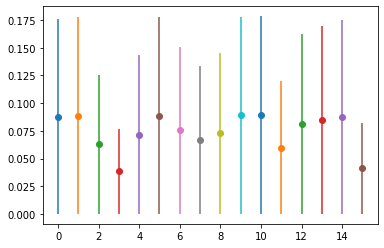

In [ ]:
#Compare all of those confidence intervals graphically on a single graph.
for index,ci in enumerate(intervals):
  plt.errorbar(index,ci[2],yerr=ci[-1],fmt='o')
plt.show()

In [ ]:
#developer survey
!wget https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey/download

--2020-07-15 21:06:10--  https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey/download
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /account/login?returnUrl=%2Fstackoverflow%2Fstack-overflow-2018-developer-survey%2Fdata [following]
--2020-07-15 21:06:11--  https://www.kaggle.com/account/login?returnUrl=%2Fstackoverflow%2Fstack-overflow-2018-developer-survey%2Fdata
Reusing existing connection to www.kaggle.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘download’

download                [ <=>                ]   9.25K  --.-KB/s    in 0.03s   

2020-07-15 21:06:11 (312 KB/s) - ‘download’ saved [9469]



In [ ]:
!unzip download

Archive:  download
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of download or
        download.zip, and cannot find download.ZIP, period.


In [ ]:
#Annoying. It looks like I'd need to sign up with my own credentials and token

In [ ]:
#aaaand it crashed my collaboratory trying to download the survey
# My free stuff isn't good enough >:(

In [ ]:
df = pd.read_csv('survey_results_public.csv')
df.head(2)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,...,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,...,7.0,2.0,6.0,3.0,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,Moderately dissatisfied,Neither satisfied nor dissatisfied,Working in a different or more specialized tec...,I am actively looking for a job,More than 4 years ago,1.0,7.0,10.0,8.0,2.0,5.0,4.0,3.0,6.0,9.0,1.0,5.0,3.0,7.0,10.0,4.0,11.0,9.0,6.0,2.0,8.0,3.0,1.0,...,4.0,6.0,7.0,2.0,Increasing automation of jobs,Increasing automation of jobs,The developers or the people creating the AI,I'm excited about the possibilities more than ...,Depends on what it is,Depends on what it is,Upper management at the company/organization,Yes,10 (Very Likely),A few times per month or weekly,Yes,A few times per month or weekly,Yes,"No, I have one but it's out of date",7,Yes,A little bit interested,A little bit interested,A little bit interested,A little bit interested,A little bit interested,Between 6:01 - 7:00 AM,5 - 8 hours,30 - 59 minutes,Never,Ergonomic keyboard or mouse,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [ ]:
ct = pd.crosstab(df['AIDangerous'],df['JobSatisfaction'],margins=True)
ct

JobSatisfaction,Extremely dissatisfied,Extremely satisfied,Moderately dissatisfied,Moderately satisfied,Neither satisfied nor dissatisfied,Slightly dissatisfied,Slightly satisfied,All
AIDangerous,,,,,,,,
Algorithms making important decisions,500,2893,1442,5872,998,1590,2130,15425
"Artificial intelligence surpassing human intelligence (""the singularity"")",490,2450,1268,5445,1038,1525,2167,14383
"Evolving definitions of ""fairness"" in algorithmic versus human decisions",408,2387,1131,5017,813,1245,1833,12834
Increasing automation of jobs,404,1676,941,3641,770,1116,1510,10058
All,1802,9406,4782,19975,3619,5476,7640,52700


In [ ]:
chi2, p_value, dof, expected = stats.chi2_contingency(ct)

print("chi2 statistic", chi2)
print("p value", p_value)
print("degrees of freedom",dof)
print("expected frequencies table \n", expected)

chi2 statistic 97.72575314239423
p value 5.769247546307698e-13
degrees of freedom 18
expected frequencies table 
 [[ 527.43548387 2753.08444023 1399.66508539 5846.57258065 1059.2613852
  1602.79506641 2236.18595825]
 [ 491.80580645 2567.10622391 1305.11396584 5451.62096774  987.70544592
  1494.52197343 2085.1256167 ]
 [ 438.84       2290.63764706 1164.55764706 4864.5         881.33294118
  1333.56705882 1860.56470588]
 [ 343.91870968 1795.1716888   912.66330171 3812.30645161  690.7002277
  1045.11590133 1458.12371917]]


In [ ]:
np.random.RandomState(42).binomial(n=20,p=0.5,size=20)

array([ 9, 14, 11, 11,  8,  8,  7, 12, 11, 11,  5, 14, 12,  8,  8,  8,  9,
       10, 10,  9])

In [ ]:
import matplotlib.pyplot as plt

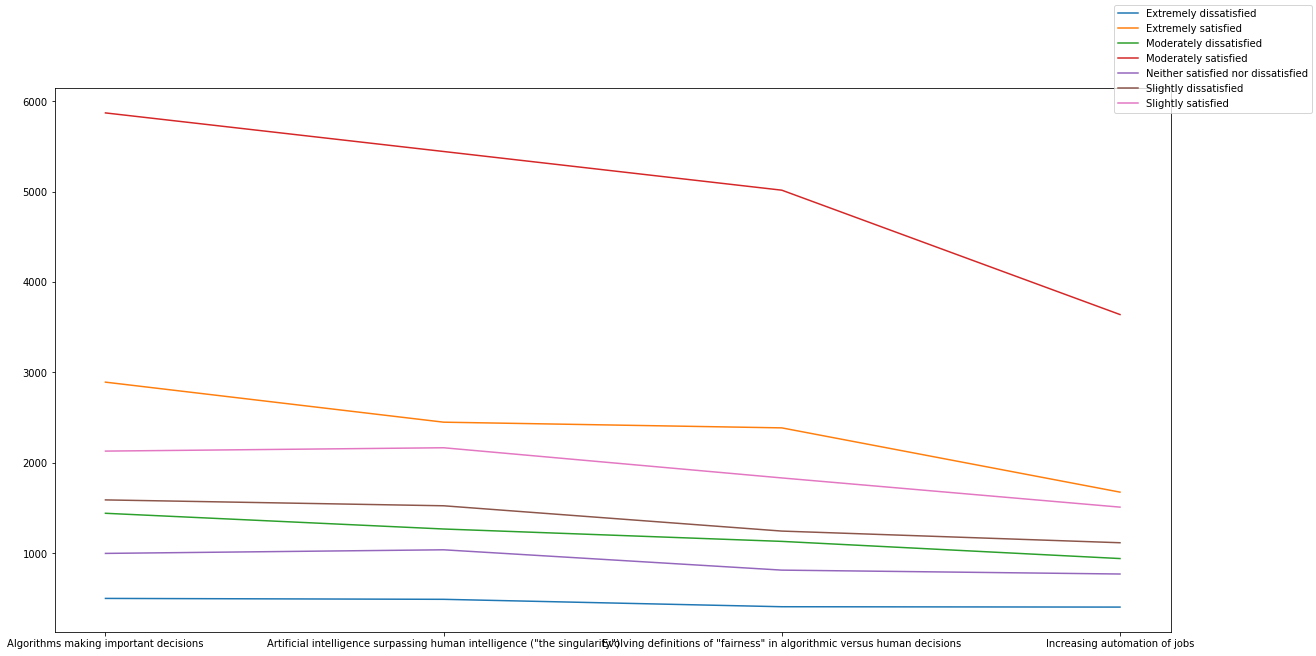

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(ct.iloc[:-1,:-1])
fig.legend(ct.columns)